In [1]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.preprocessing import LabelEncoder

import json 

import pickle


## Problem Statement :

## Data Gathering :

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.shape

(9578, 14)

In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

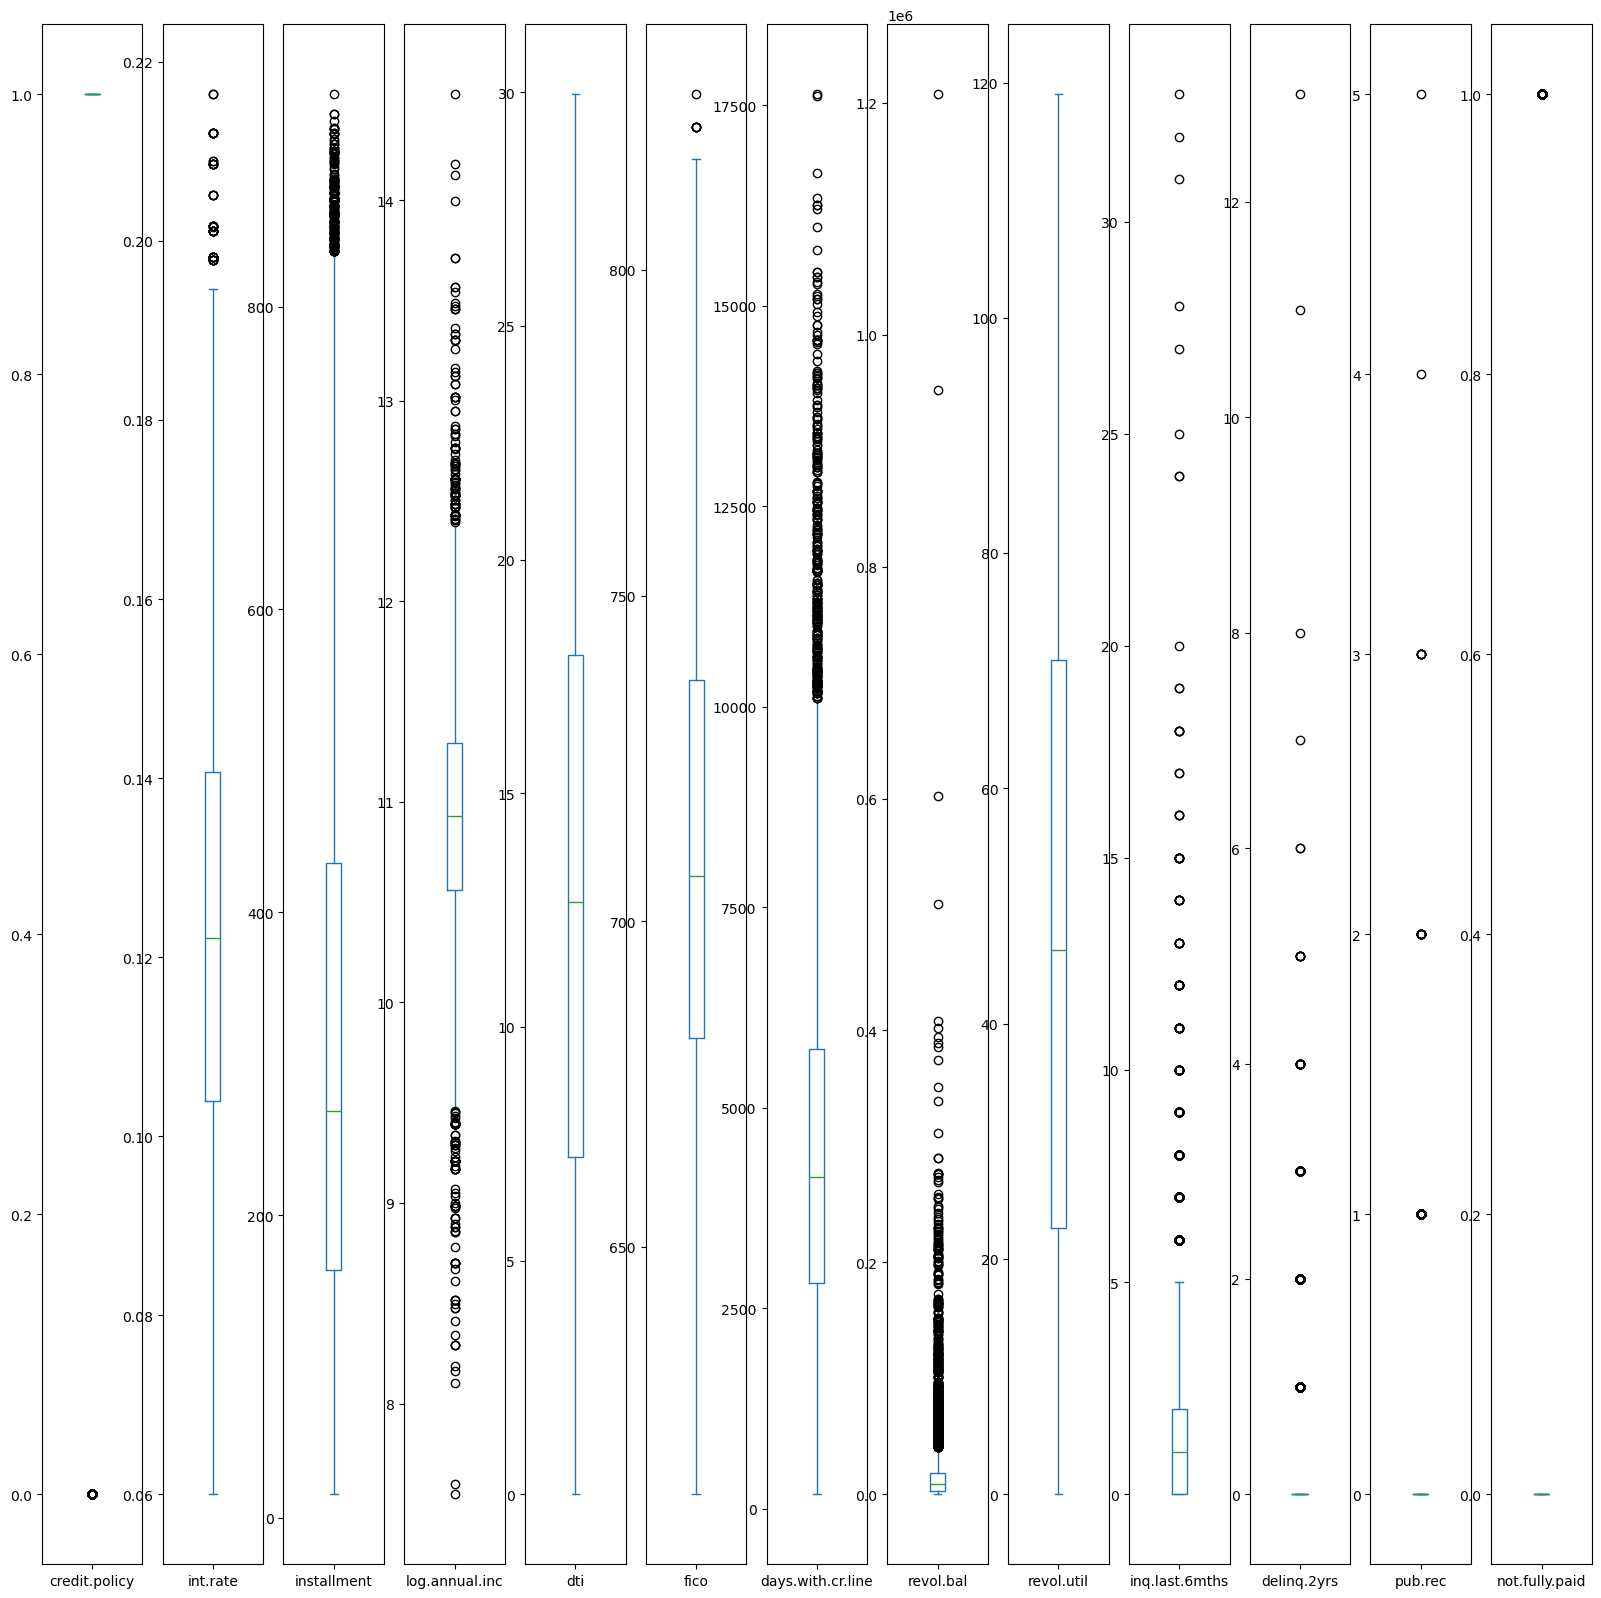

In [9]:
df.plot(kind='box',subplots=True,figsize=(20,20))
plt.show()

<Axes: >

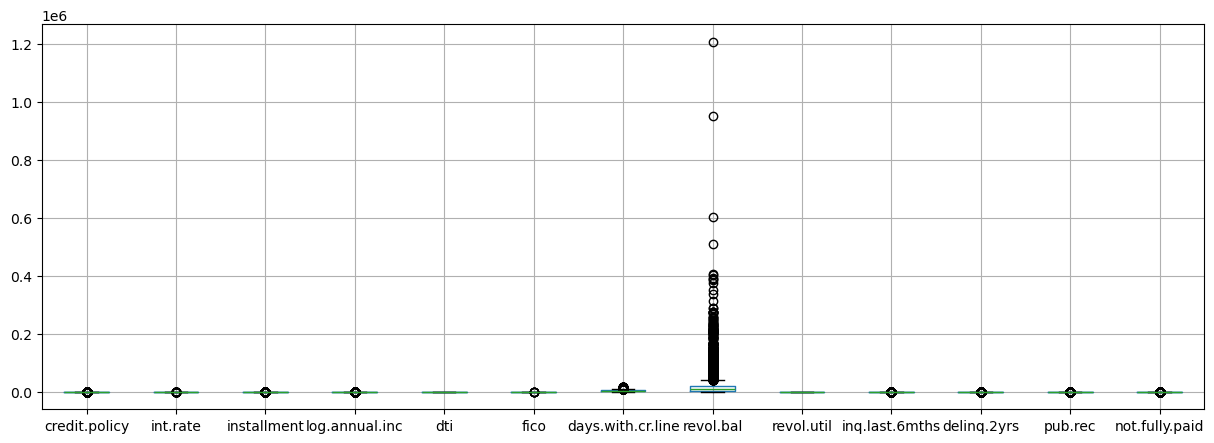

In [11]:
plt.figure(figsize=(15,5))
df.boxplot()

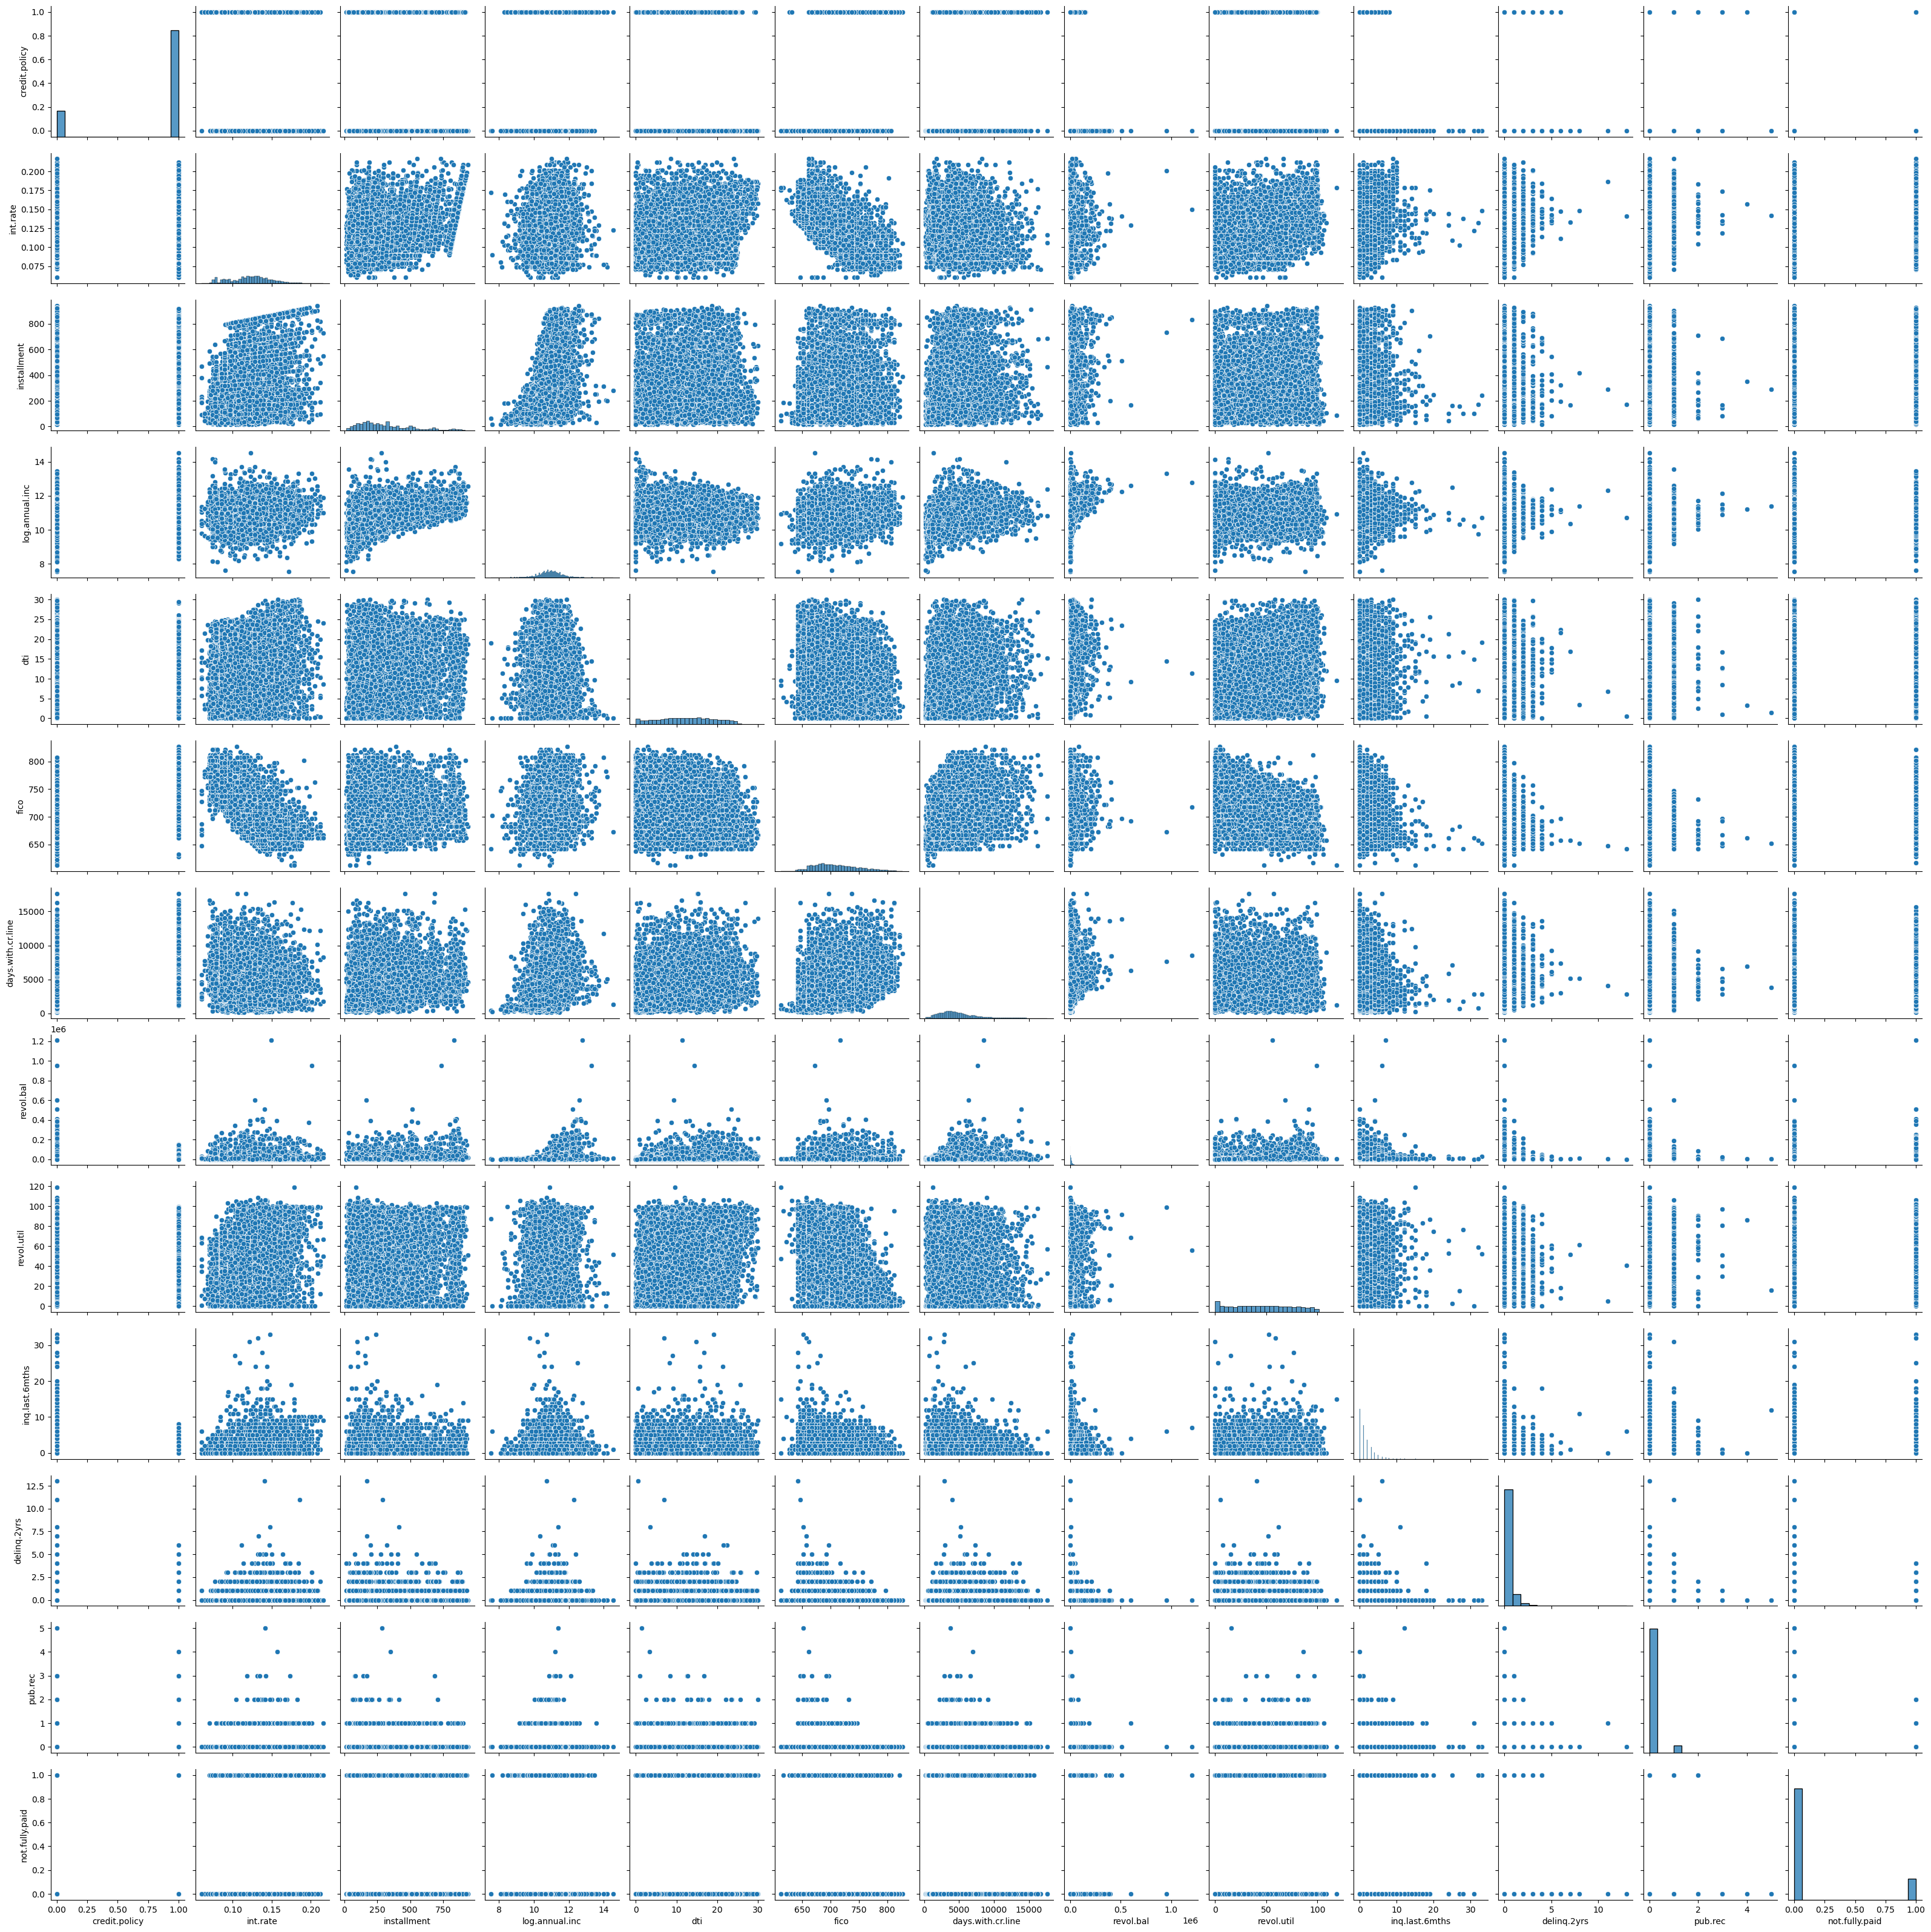

In [12]:
sns.pairplot(df)

## Feature Engineering :

## 1. credit.policy

In [13]:
df['credit.policy'].unique()

array([1, 0], dtype=int64)

<Axes: >

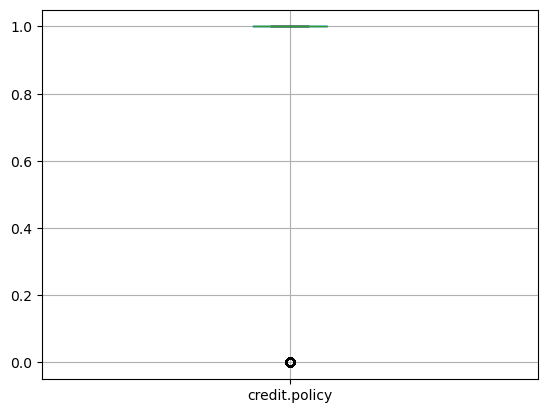

In [15]:
df[['credit.policy']].boxplot()

## 2. purpose

In [16]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [17]:
df = pd.get_dummies(df,columns=['purpose'])
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


## 3. int.rate

In [18]:
df['int.rate'].unique()

array([0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.0788, 0.1496, 0.1114,
       0.1134, 0.1221, 0.1347, 0.1324, 0.0859, 0.0714, 0.0863, 0.1103,
       0.1317, 0.0894, 0.1039, 0.1513, 0.08  , 0.1355, 0.1229, 0.0901,
       0.0743, 0.1375, 0.0807, 0.1028, 0.087 , 0.1122, 0.0996, 0.0933,
       0.0838, 0.0775, 0.1059, 0.1596, 0.1154, 0.1343, 0.1249, 0.0964,
       0.1186, 0.1501, 0.128 , 0.1091, 0.1217, 0.1533, 0.0712, 0.1438,
       0.1565, 0.1467, 0.1312, 0.147 , 0.1407, 0.1014, 0.1046, 0.133 ,
       0.0983, 0.1393, 0.092 , 0.1236, 0.1362, 0.1078, 0.1583, 0.1109,
       0.1141, 0.1267, 0.1204, 0.0951, 0.1172, 0.1299, 0.1488, 0.152 ,
       0.1425, 0.1836, 0.1615, 0.06  , 0.0832, 0.1261, 0.0945, 0.1197,
       0.1387, 0.0976, 0.1292, 0.0737, 0.0768, 0.1166, 0.1418, 0.1545,
       0.1482, 0.1703, 0.145 , 0.1671, 0.1576, 0.1608, 0.164 , 0.1734,
       0.1051, 0.157 , 0.1222, 0.1273, 0.1379, 0.1253, 0.1128, 0.1286,
       0.1287, 0.097 , 0.1001, 0.1538, 0.1191, 0.1254, 0.1159, 0.138 ,
      

<Axes: >

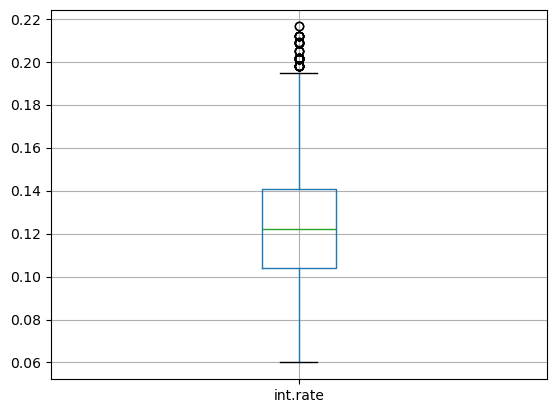

In [19]:
df[['int.rate']].boxplot()

## 4. installment

In [20]:
df['installment'].unique()

array([829.1 , 228.22, 366.86, ..., 161.01, 257.7 , 853.43])

<Axes: >

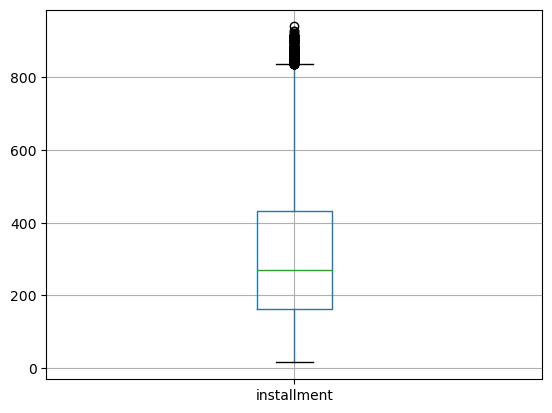

In [21]:
df[['installment']].boxplot()

## 5. log.annual.inc

In [22]:
df['log.annual.inc'].unique()

array([11.35040654, 11.08214255, 10.37349118, ..., 12.29225034,
       10.99909533, 10.11047245])

<Axes: >

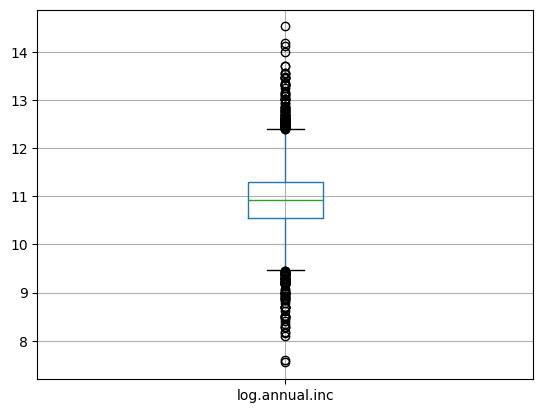

In [23]:
df[['log.annual.inc']].boxplot()

## 6. dti

In [24]:
df['dti'].unique()

array([19.48, 14.29, 11.63, ..., 10.31, 23.74, 24.05])

<Axes: >

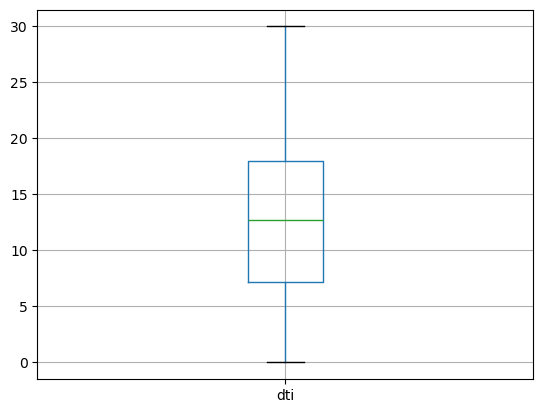

In [25]:
df[['dti']].boxplot()

## 7. fico

In [26]:
df['fico'].unique()

array([737, 707, 682, 712, 667, 727, 722, 677, 662, 767, 747, 702, 672,
       797, 772, 782, 802, 812, 742, 692, 777, 762, 757, 787, 717, 752,
       792, 627, 687, 697, 732, 822, 632, 807, 817, 827, 642, 647, 652,
       657, 637, 612, 617, 622], dtype=int64)

<Axes: >

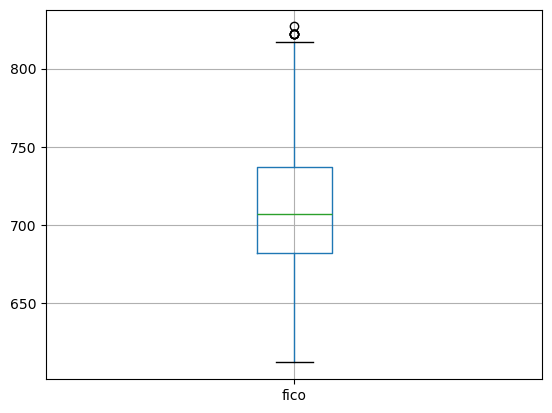

In [27]:
df[['fico']].boxplot()

## 8. days.with.cr.line

In [28]:
df['days.with.cr.line'].unique()

array([ 5639.958333,  2760.      ,  4710.      , ...,  3423.041667,
        5916.      , 10474.      ])

<Axes: >

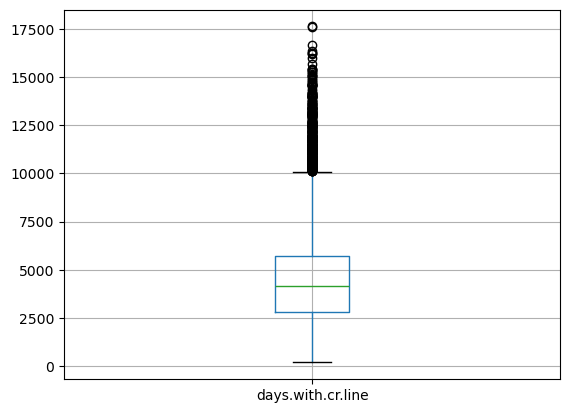

In [29]:
df[['days.with.cr.line']].boxplot()

## 9. revol.bal

In [30]:
df['revol.bal'].unique()

array([28854, 33623,  3511, ...,   184, 10036, 37879], dtype=int64)

<Axes: >

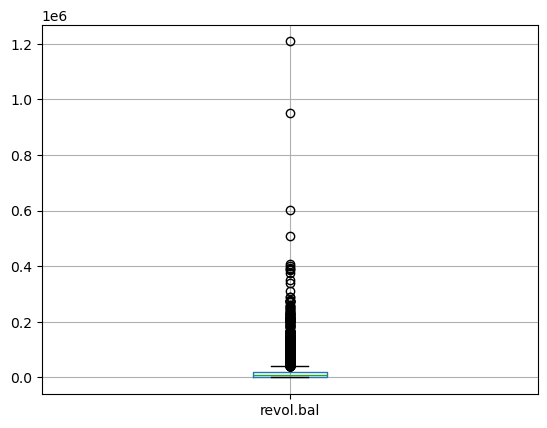

In [31]:
df[['revol.bal']].boxplot()

## 10. revol.util

In [32]:
df['revol.util'].unique()

array([ 52.1 ,  76.7 ,  25.6 , ..., 104.3 , 106.4 ,  69.14])

<Axes: >

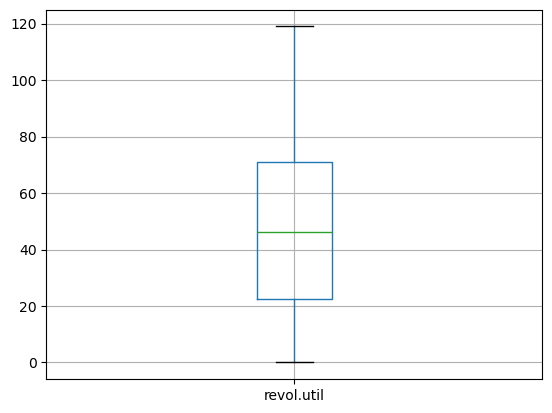

In [33]:
df[['revol.util']].boxplot()

## 11. inq.last.6mths

In [34]:
df['inq.last.6mths'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 33,  9, 18, 14, 15, 13, 12, 10,
       19, 11, 16, 20, 27, 25, 28, 31, 24, 17, 32], dtype=int64)

<Axes: >

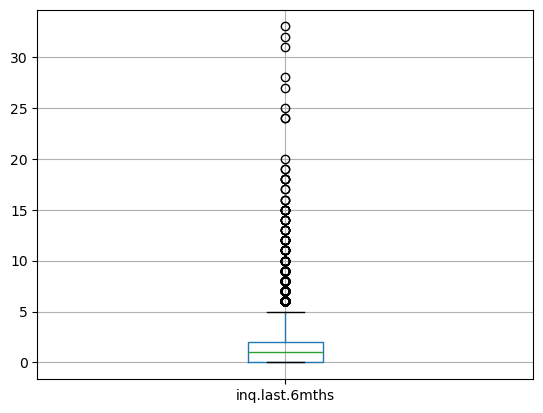

In [35]:
df[['inq.last.6mths']].boxplot()

## 12. delinq.2yrs

In [36]:
df['delinq.2yrs'].unique()

array([ 0,  1,  2,  4,  3,  5,  6, 13,  7,  8, 11], dtype=int64)

<Axes: >

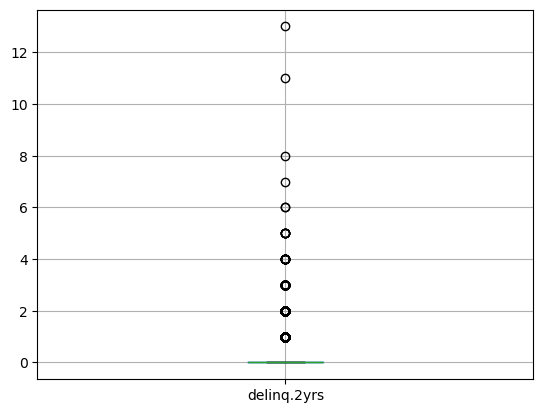

In [37]:
df[['delinq.2yrs']].boxplot()

## 13. pub.rec

In [38]:
df['pub.rec'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

<Axes: >

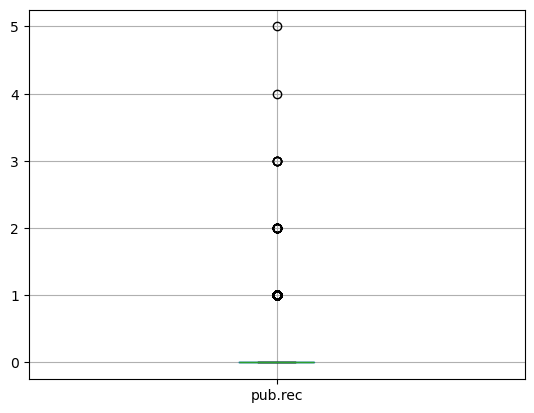

In [39]:
df[['pub.rec']].boxplot()

## 14. not.fully.paid

In [40]:
df['not.fully.paid'].unique()

array([0, 1], dtype=int64)

<Axes: >

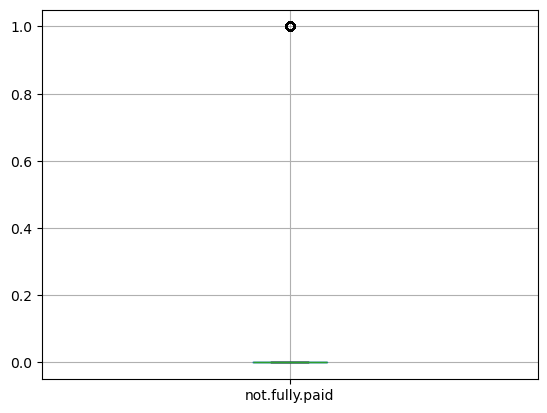

In [41]:
df[['not.fully.paid']].boxplot()

## Model Building :

In [42]:
x = df.drop('not.fully.paid',axis =1 )
y = df['not.fully.paid']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [44]:
model = LogisticRegression()

In [45]:
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred_test = model.predict(x_test)

y_pred_train = model.predict(x_train)

## Model Evaluation :

In [47]:
# for testing 

cnfx = confusion_matrix(y_test,y_pred_test)

clas = classification_report(y_test,y_pred_test)

acc = accuracy_score(y_test,y_pred_test)

print(cnfx)

print(clas)

print('Testing Accuracy :',round(acc,2))

[[1606    4]
 [ 304    2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1610
           1       0.33      0.01      0.01       306

    accuracy                           0.84      1916
   macro avg       0.59      0.50      0.46      1916
weighted avg       0.76      0.84      0.77      1916

Testing Accuracy : 0.84


In [48]:
# for training 

cnfx = confusion_matrix(y_train,y_pred_train)

clas = classification_report(y_train,y_pred_train)

acc = accuracy_score(y_train,y_pred_train)

print(cnfx)

print(clas)

print('Training Accuracy :',round(acc,2))

[[6408   27]
 [1207   20]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6435
           1       0.43      0.02      0.03      1227

    accuracy                           0.84      7662
   macro avg       0.63      0.51      0.47      7662
weighted avg       0.77      0.84      0.77      7662

Training Accuracy : 0.84


## Dictionary of Columns :

In [50]:
column_names = x.columns
column_names

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [52]:
json_data = {'column_names':list(x.columns)}
json_data

{'column_names': ['credit.policy',
  'int.rate',
  'installment',
  'log.annual.inc',
  'dti',
  'fico',
  'days.with.cr.line',
  'revol.bal',
  'revol.util',
  'inq.last.6mths',
  'delinq.2yrs',
  'pub.rec',
  'purpose_all_other',
  'purpose_credit_card',
  'purpose_debt_consolidation',
  'purpose_educational',
  'purpose_home_improvement',
  'purpose_major_purchase',
  'purpose_small_business']}

In [53]:
# saving dictionary into json file

with open('Loan.json','w') as f :
    json.dump(json_data,f)

In [55]:
# saving model into pickle file

with open('Loan.pkl','wb') as f:
    pickle.dump(model,f)

## Single user input Testing :

In [56]:
x.head(1).T

,0
credit.policy,1
int.rate,0.1189
installment,829.1
log.annual.inc,11.350407
dti,19.48
fico,737
days.with.cr.line,5639.958333
revol.bal,28854
revol.util,52.1
inq.last.6mths,0


In [61]:
credit_policy = 1
int_rate = 0.1189
installment = 829.1
log_annual_inc	= 1.350407
dti	 = 19.48
fico = 737
days_with_cr_line = 5639.958333
revol_bal = 28854
revol_util = 52.1
inq_last_6mths = 0
delinq_2yrs = 0
pub_rec = 0

purpose = 'all_other'
purpose = 'purpose_' + purpose
purpose_index = list(x.columns).index(purpose)


In [62]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [63]:
array = np.zeros(len(x.columns))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [65]:
array[0] = credit_policy
array[1] = int_rate
array[2] = installment
array[3] = log_annual_inc
array[4] = dti
array[5] = fico
array[6] = days_with_cr_line
array[7] = revol_bal
array[8] = revol_util
array[9] = inq_last_6mths
array[10] = delinq_2yrs
array[11] = pub_rec

array[purpose_index] == 1

array

array([1.00000000e+00, 1.18900000e-01, 8.29100000e+02, 1.35040700e+00,
       1.94800000e+01, 7.37000000e+02, 5.63995833e+03, 2.88540000e+04,
       5.21000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [68]:
predict = model.predict([array])[0]

if predict == 0:

    print('Loan is NOT Fully Paid...')

else :

    print('Loan is Fully Paid....')

Loan is NOT Fully Paid...
